In [12]:
import numpy as np
import cv2

In [13]:
npz = '/raid/mpsych/OMAMA/DATA/data/2d_resized_512/images/10195895820725132694762818055891556958.npz'
image_file = '/raid/mpsych/OMAMA/DATA/data/train/sample_14520.png'

In [16]:
def win_scale(data, wl, ww, dtype, out_range):
    data_new = np.empty(data.shape, dtype=np.double)
    data_new.fill(out_range[1]-1)
    data_new[data <= (wl-ww/2.0)] = out_range[0]
    data_new[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))] = \
        ((data[(data>(wl-ww/2.0))&(data<=(wl+ww/2.0))]-(wl-0.5))/(ww-1.0)+0.5)*(out_range[1]-out_range[0])+out_range[0]
    data_new[data > (wl+ww/2.0)] = out_range[1]-1
    return data_new.astype(dtype)

def adjust_window_level(data, wl, ww, dtype=np.uint8, out_range=(0, 255)):
    adjusted_data = []
    for image in data:
        adjusted_data.append(win_scale(image, wl, ww, dtype, out_range))
    return np.stack(adjusted_data)

In [17]:
data = np.load(npz)
image_data = data['data']
wl = 2773
ww = 900
adjusted_image_data = adjust_window_level(image_data, wl, ww)
image = cv2.imread(image_file)

Information for original npz data:
Shape: (512, 512)
dtype: uint16
Pixel size (bytes): 2
Min value: 144
Max value: 3489
Number of dimensions: 2


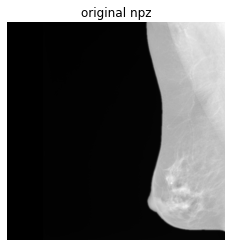


Information for adjusted npz data:
Shape: (512, 512)
dtype: uint8
Pixel size (bytes): 1
Min value: 0
Max value: 255
Number of dimensions: 2


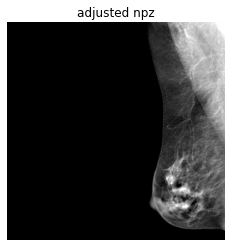


Information for Synthetic image data:
Shape: (640, 512, 3)
dtype: uint8
Pixel size (bytes): 1
Min value: 0
Max value: 255
Number of dimensions: 3


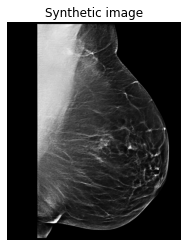

In [34]:
def view_info(data, name):
    print(f"Information for {name} data:")
    print("Shape:", data.shape)
    print("dtype:", data.dtype)
    print("Pixel size (bytes):", data.itemsize)
    print("Min value:", np.min(data))
    print("Max value:", np.max(data))
    print("Number of dimensions:", data.ndim)
    plt.imshow(data,cmap='gray')
    plt.title(name)
    plt.axis('off')
    plt.show()
    print()

# Example usage
view_info(image_data, "original npz")
view_info(adjusted_image_data, "adjusted npz")
view_info(image, "Synthetic image")
